# GAMMA TELESCOPE

### The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere.
### The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).


## Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("gamma.csv",names=[ 'fLength', 'fWidth','fSize' ,'fConc' ,'fConc1','fAsym' ,'fM3Long','fM3Trans' ,'fAlpha' ,'fDist','class'])
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [37]:
data.describe(include="all")

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12332
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,NaN
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,NaN
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,NaN
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,NaN
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,NaN
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,NaN


In [7]:
data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

#  EDA


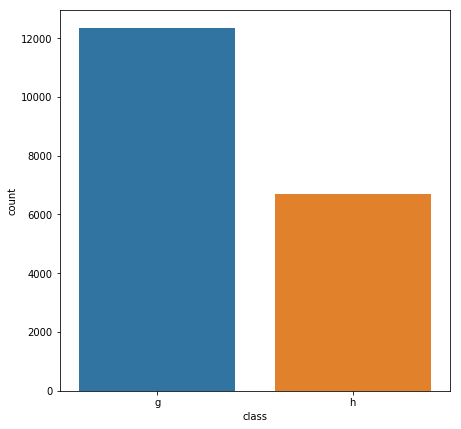

In [8]:

plt.figure(figsize=(7,7))
sns.countplot(data['class'])
plt.show()

<Figure size 1224x1224 with 0 Axes>

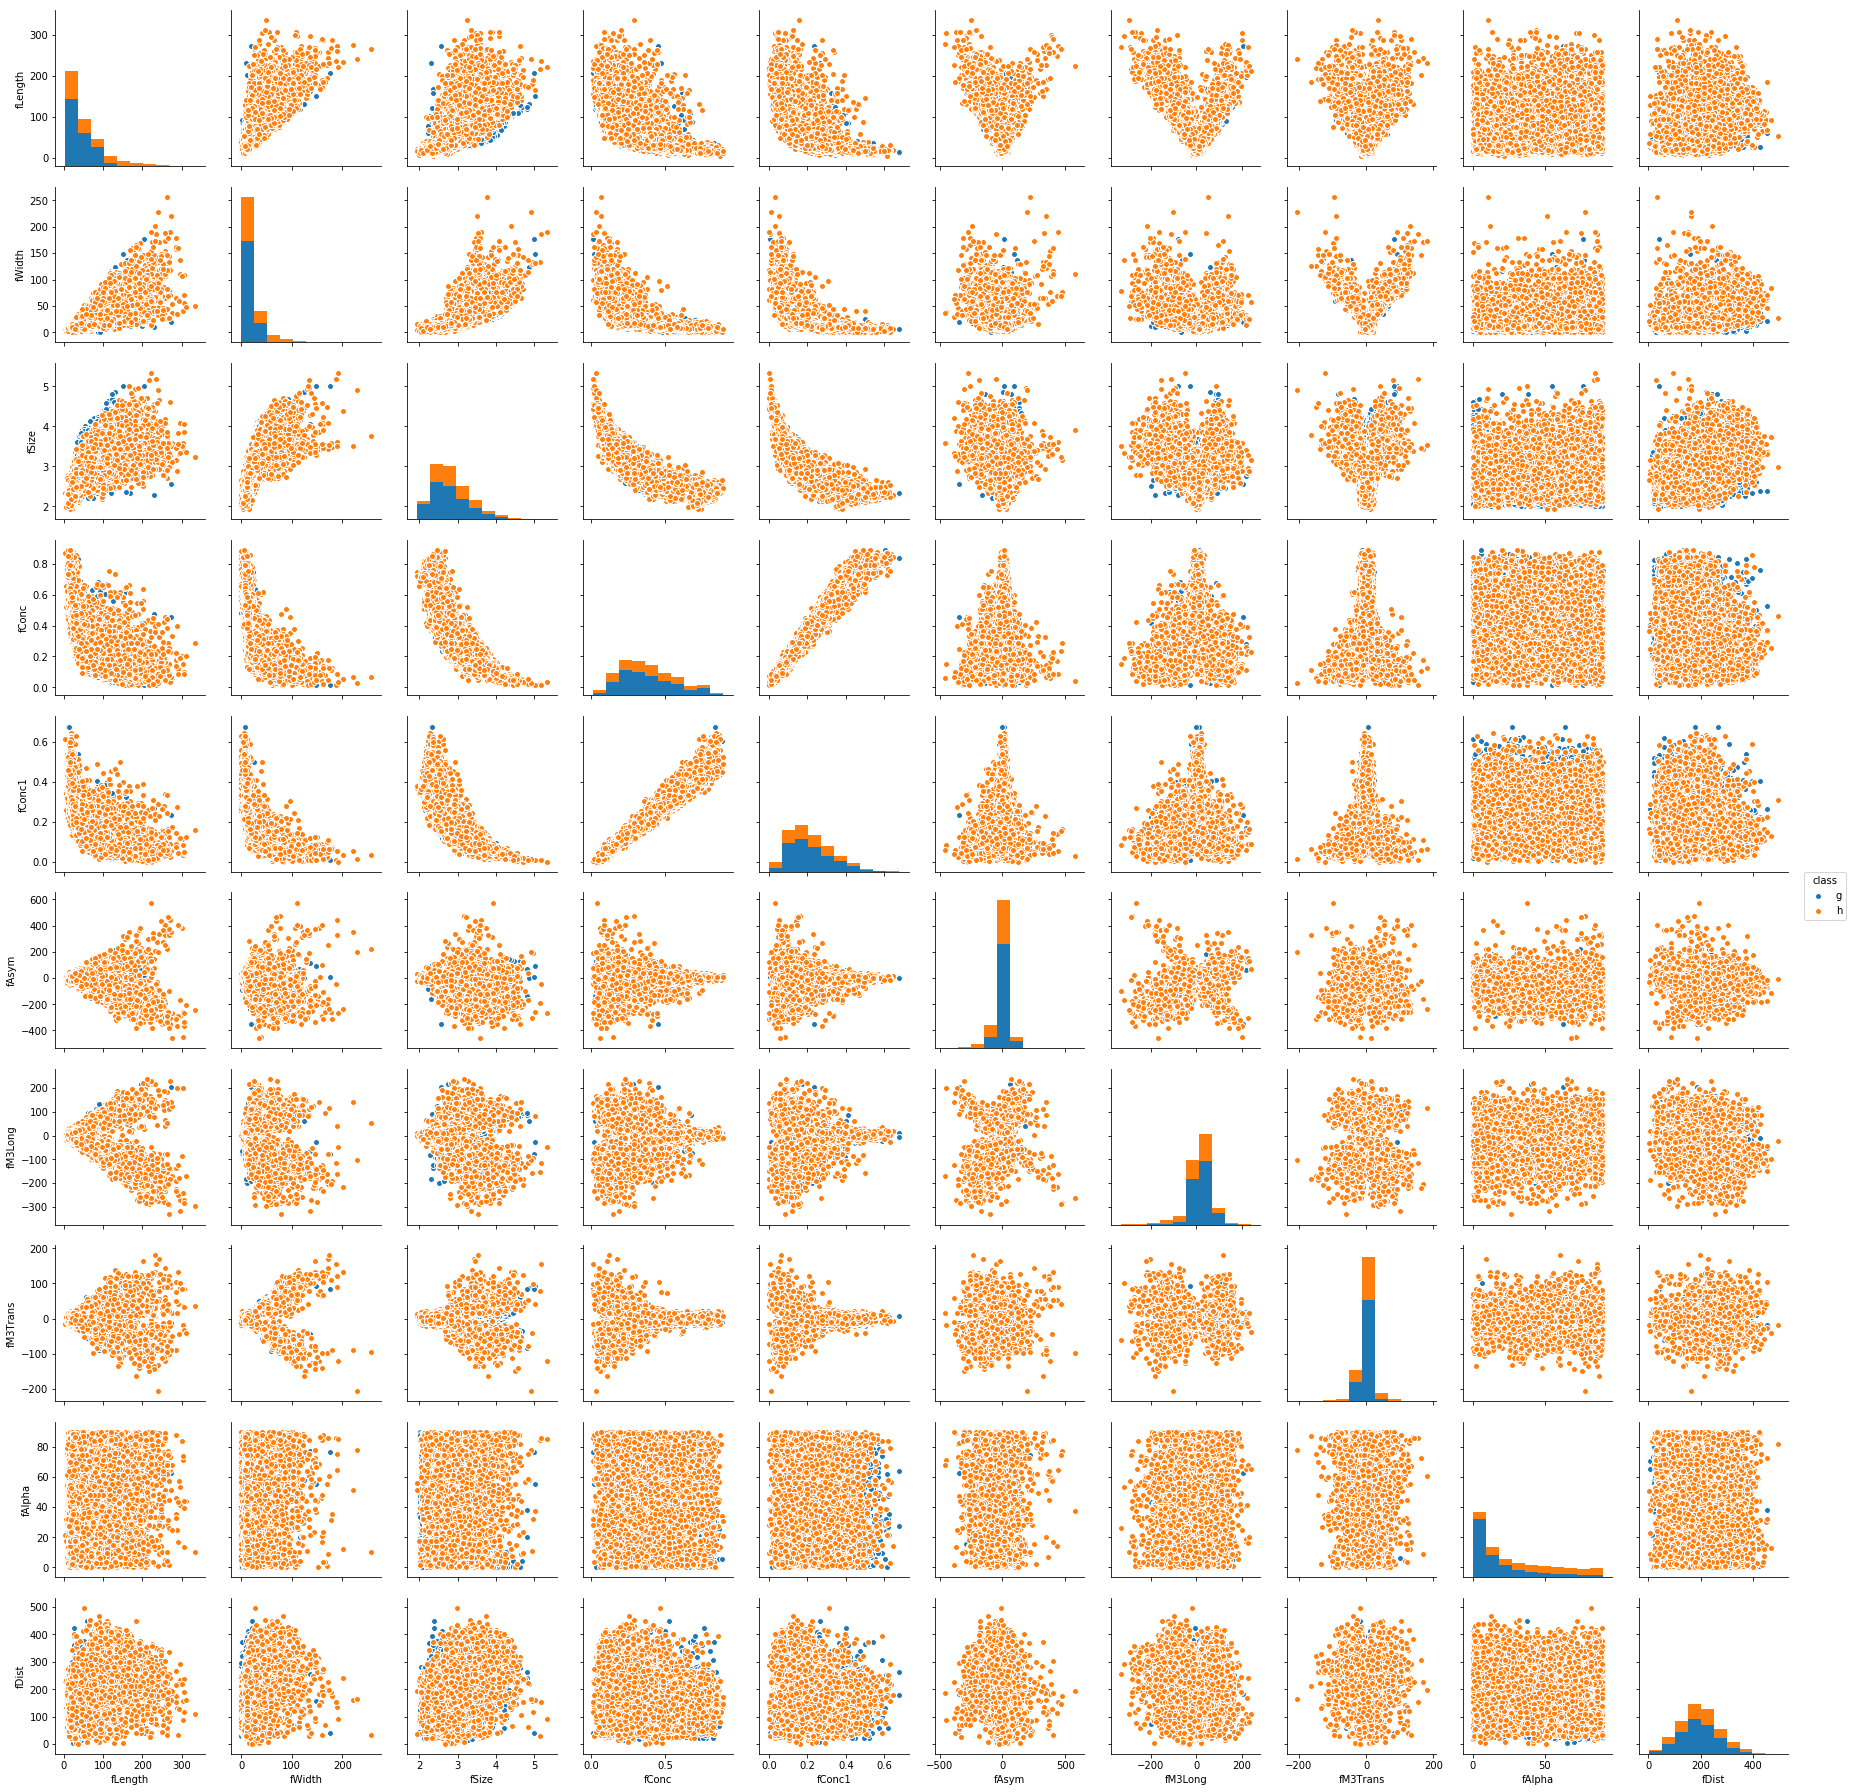

In [9]:
plt.figure(figsize=(17,17))
sns.pairplot(data=data,hue='class')
plt.show()

In [24]:
sns.relplot(data=data,x='fConc',y='fConc1',hue='class')
plt.show()

AttributeError: module 'seaborn' has no attribute 'relplot'

# Bi-variate analysis to find if we have some corelation in our data or not¶

sns.scatterplot(data=data,x='fLength',y='fWidth',hue='class')
plt.show()

In [16]:
sns.scatterplot(data=data,x='fLength',y='fWidth',hue='class')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

# Multi-variate analysis

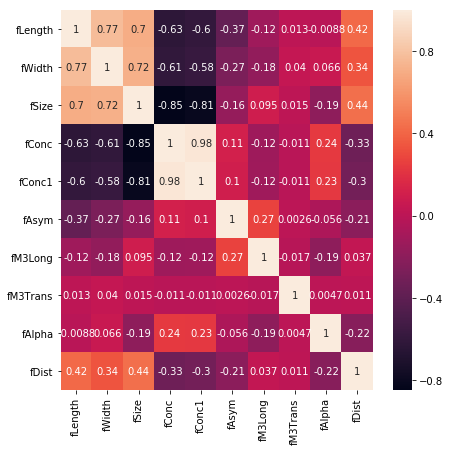

In [17]:
C=data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(C,annot=True)
plt.show()

### Through the above heatmap, we can clearly say that dropping either fConc or fConc1in respect to each other and either of fSize or fConc, so we drop 'fConc1' and 'fSize'

In [38]:
data=data.drop(['fConc1','fSize'],axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler
Y=data['class']
Y=np.where(data['class']=='g',0,1)
data=data.drop(['class'],axis=1)
SS=StandardScaler()
data1=pd.DataFrame(SS.fit_transform(data),columns=[ 'fLength','fWidth' ,'fConc' ,'fAsym' ,'fM3Long','fM3Trans' ,'fAlpha' ,'fDist'])
data1

,fLength,fWidth,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.577226,-0.336804,0.062759,0.541042,0.224818,-0.405842,0.476816,-1.497866
1,-0.510969,-0.570027,0.820383,0.516919,0.260364,-0.490094,-0.815418,0.153125
2,2.568278,6.205858,-1.875883,2.044992,-1.478536,-2.183030,1.889224,0.842635
3,-0.694768,-0.687259,1.282069,0.532771,-0.333515,-0.355359,-0.658804,-1.031463
4,0.516622,0.476384,-0.347506,-0.020200,0.353086,1.036620,-0.881039,2.176427
5,-0.038386,-0.056186,-0.756678,0.932494,0.640077,0.459251,-0.920690,0.592534
6,-0.118105,-0.262977,-0.697053,0.217969,0.540212,0.496333,-0.875523,0.338138
7,-0.624601,-0.459046,0.236712,0.573700,0.194327,-0.152636,-1.027996,0.579634
8,1.014607,1.326507,-1.654340,1.937129,1.460879,2.061502,-0.873147,0.728062
9,-0.153156,-0.380564,-0.233179,0.491289,0.653576,-0.332787,-0.757413,-1.225308


# principal component analysis


In [40]:
from sklearn.decomposition import PCA
pc=PCA(n_components=6)
data2=pc.fit_transform(data1)

In [41]:

data2=pd.DataFrame(data2,columns=[x for x in range(len(data2[0]))])

In [42]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data2,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
Lr=LogisticRegression()
Lr.fit(X_Train,Y_Train)
Pred=Lr.predict(X_Test)

In [44]:
print(roc_auc_score(Pred,Y_Test))
lst = []
lst.append(roc_auc_score(Pred,Y_Test))

0.7750480793147282


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_Train,Y_Train)
Pred=rfc.predict(X_Test)
print(roc_auc_score(Pred,Y_Test))
lst.append(roc_auc_score(Pred,Y_Test))

0.7992410635334689


# Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_Train,Y_Train)
pred=gbc.predict(X_Test)
print(roc_auc_score(pred,Y_Test))
lst.append(roc_auc_score(Pred,Y_Test))

0.8096572850212538


# Support Vector Machine

In [47]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf')
sv.fit(X_Train,Y_Train)
pred=sv.predict(X_Test)
print(roc_auc_score(pred,Y_Test))

0.8357093663911846


In [48]:
grid={'kernel':['linear','poly','rbf'],'gamma':[x/1000 for x in range(0,1000)]}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
rcv=RandomizedSearchCV(estimator=sv,param_distributions=grid)
rcv.fit(X_Train,Y_Train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'kernel': ['linear', 'poly', 'rbf'], 'gamma': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033,...5, 0.986, 0.987, 0.988, 0.989, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [54]:
print(rcv.best_estimator_)
print(rcv.best_score_)
print(rcv.best_estimator_.kernel)
print(rcv.best_estimator_.gamma)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.865, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8192691903259727
rbf
0.865


In [56]:
sv=SVC(kernel='rbf',gamma=0.932)
sv.fit(X_Train,Y_Train)
pred=sv.predict(X_Test)
print(roc_auc_score(pred,Y_Test))

0.827328116452306
